<a href="https://colab.research.google.com/github/oscarzapi/module11/blob/main/prompt_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

# 1. We will start importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pylab
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# 2. Now time to load the dataset of used cars.

In [ ]:
df = pd.read_csv("vehicles.csv")
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


As we can see, the dataset provides information about car specs. We aim to develop a predictive model that estimates the most important features affecting the  price of used vehicles based on their attributes. This involves identifying and quantifying the influence of features such as year, manufacturer, model, condition, mileage (odometer), fuel type, transmission, drive type, and vehicle category (e.g., truck, SUV, sedan) on the target variable — price. The task includes data cleaning, feature engineering, and applying regression or machine learning techniques to uncover patterns and build a reliable pricing model.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
 # Checking for the dimensions of the data as
 df.shape

(426880, 18)

In [ ]:
print("The dataset contains",df.shape[0],"rows and",df.shape[1],"columns")

The dataset contains 426880 rows and 18 columns


In [ ]:
# Checking for basic information of the dataset as
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [ ]:
print("The dataset contains",df.duplicated().sum(),"duplicate rows")
print("The dataset contains",df.isnull().sum().sum(),"missing values")
print("The dataset contains",df.nunique().sum(),"unique values")
# how many categorical and numerical columns in the dataset
print("The dataset contains",df.select_dtypes(include='object').shape[1],"categorical columns")
print("The dataset contains",df.select_dtypes(include='number').shape[1],"numerical columns")

The dataset contains 0 duplicate rows
The dataset contains 1215152 missing values
The dataset contains 695971 unique values
The dataset contains 14 categorical columns
The dataset contains 4 numerical columns


In [ ]:
# let's describe the dataset
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


Insights
- ID values are consistent and likely unique identifiers.
Price has a very high standard deviation and a maximum value of over $3.7 billion, which suggests outliers or data entry errors.
- Year ranges from 1900 to 2022, with a median of 2013. Values before 1980 may be rare or vintage vehicles.
- Odometer readings vary widely, with some entries showing 0 and others up to 10 million, indicating possible missing or erroneous values.

In [ ]:
# let's check for NaN values as the header shows already some
df.isna().sum()

,0
id,0
region,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400


As we see, there are some attributes which have many NaN values (up to almost 50% of all records, such as condition, cylinders, VIN and size). We will take care of them by applying the following steps.

<Axes: >

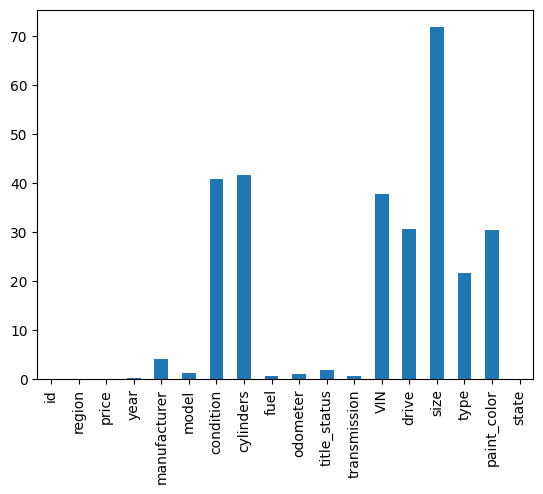

In [ ]:
# let's see what is the percentage of Nan Values per column versus total records for each column as a bar chart with the data labels
(df.isna().sum()/df.shape[0]*100).plot(kind='bar')

In [ ]:
# Let's drop all NaN values from dataset
df.dropna(inplace=True)

<Axes: >

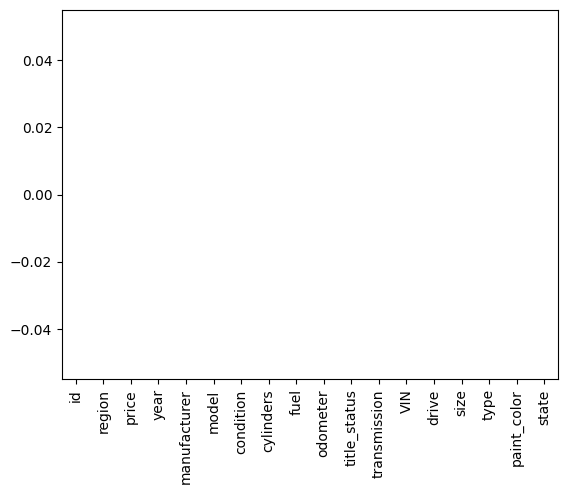

In [ ]:
# let's check what is the percentage of Nan Values per column versus total records for each column as a bar chart with the data labels
(df.isna().sum()/df.shape[0]*100).plot(kind='bar')

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

Now it is time to check for how the categorial and numerical columns look like. For that, we will explore the data and if necessary, apply the changes to have a good data preparation steps for further modeling.

In [ ]:
# let's show the categorical columns of the dataset as:
df.select_dtypes(include='object').head()

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,state
126,auburn,chevrolet,express cargo van,like new,6 cylinders,gas,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al
127,auburn,chevrolet,express cargo van,like new,6 cylinders,gas,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al
128,auburn,chevrolet,express cargo van,like new,6 cylinders,gas,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al
215,birmingham,toyota,echo,excellent,4 cylinders,gas,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
219,birmingham,bmw,525i,fair,6 cylinders,gas,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al


In [ ]:
# let's show the numerical columns of the dataset as:
df.select_dtypes(include='number').head()

,id,price,year,odometer
126,7305672709,0,2018.0,68472.0
127,7305672266,0,2019.0,69125.0
128,7305672252,0,2018.0,66555.0
215,7316482063,4000,2002.0,155000.0
219,7316429417,2500,1995.0,110661.0


As a small change, we can delete the decimals from the year column

In [ ]:
# Let's delete the decimals from the year column to show it as an integer
df['year'] = df['year'].astype(int)

In [ ]:
df.select_dtypes(include='number').head()

,id,price,year,odometer
126,7305672709,0,2018,68472.0
127,7305672266,0,2019,69125.0
128,7305672252,0,2018,66555.0
215,7316482063,4000,2002,155000.0
219,7316429417,2500,1995,110661.0


# 3. Exploratory Data Analysis

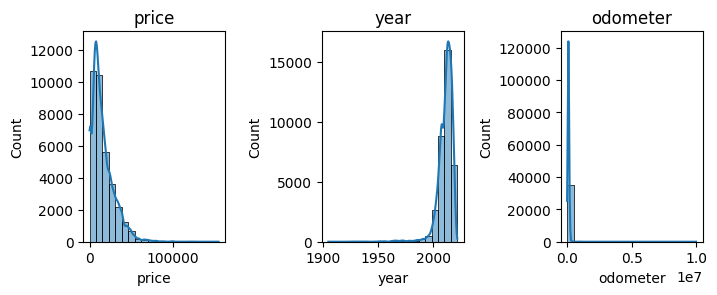

In [ ]:
# Let's observe the distribution for each numerical column

# Getting the numerical column names as an array
numerical_features = ['price', 'year', 'odometer']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

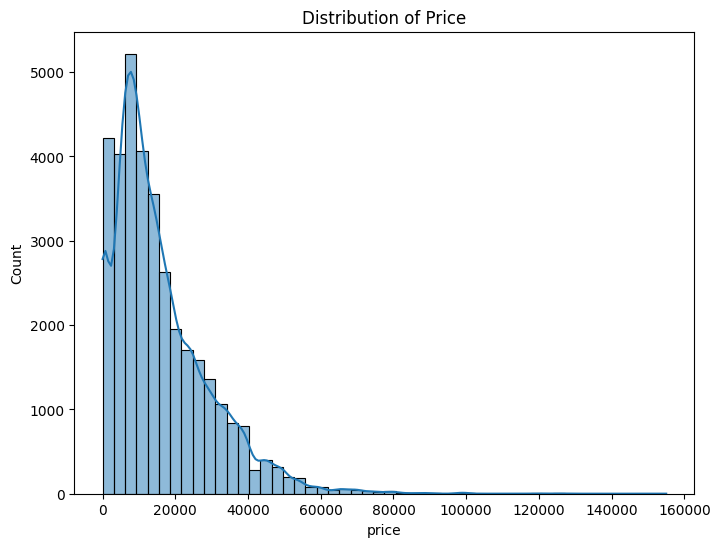

In [ ]:
# Price Analysis
plt.figure(figsize=(8, 6))
sns.histplot(data=df['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.show()

It is very clear to see that the distribution of these three attributes is very irregular, which might indicate the existence of outliers in the data. Let's manage these cases by deleting the values of:
- Price over 600k
- Year lower than 1950
- Odometer over than 500k miles

In [ ]:
# Let's drop the data with values of price over 600k, the year lower than 1950 and odometer over 500k and the VIN Column
df.drop(columns=['VIN'], inplace=True)
df = df.drop(df[(df['price'] > 600000) | (df['year'] < 1950) | (df['odometer'] > 500000)].index)

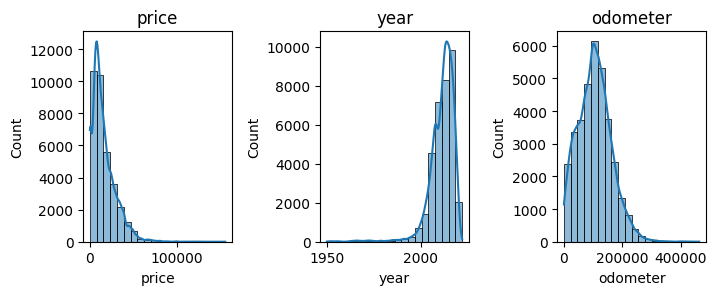

In [ ]:
plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,id,price,year,odometer
count,3.479800e+04,34798.000000,34798.000000,34798.000000
mean,7.311508e+09,15830.202167,2011.253865,105923.172223
std,4.299334e+06,13447.160699,6.777174,56463.645293
min,7.301592e+09,0.000000,1950.000000,0.000000
25%,7.308189e+09,6500.000000,2008.000000,65239.000000
50%,7.312225e+09,12000.000000,2013.000000,104000.000000
75%,7.315135e+09,22000.000000,2016.000000,141000.000000
max,7.317099e+09,155000.000000,2022.000000,464213.000000


We can see that around 100k records have been deleted and the distribution for those numeric columns look more prominent to give better insights for further analysis.

In [ ]:
# Generate the distribution for the columns values of region, manufacturer, model, type and state in a table
df[['region', 'manufacturer', 'model', 'type', 'state']].describe()

,region,manufacturer,model,type,state
count,34798,34798,34798,34798,34798
unique,392,41,5116,13,51
top,vermont,ford,f-150,SUV,ca
freq,695,7375,941,9266,3558


These columns contain many unique values as shown in the previous dataframe. So we will plot the rest of categorial columns to avoid the processor from overloading.

In [ ]:
# create an array of categorial columns of the original dataset not including the ones mentioned above
categorical_columns = df.select_dtypes(include='object').columns.tolist()

# And now excluding the columns of region, manufacturer, model, type and state from this previous variable
categorical_columns.remove('region')
categorical_columns.remove('manufacturer')
categorical_columns.remove('model')
categorical_columns.remove('type')
categorical_columns.remove('state')


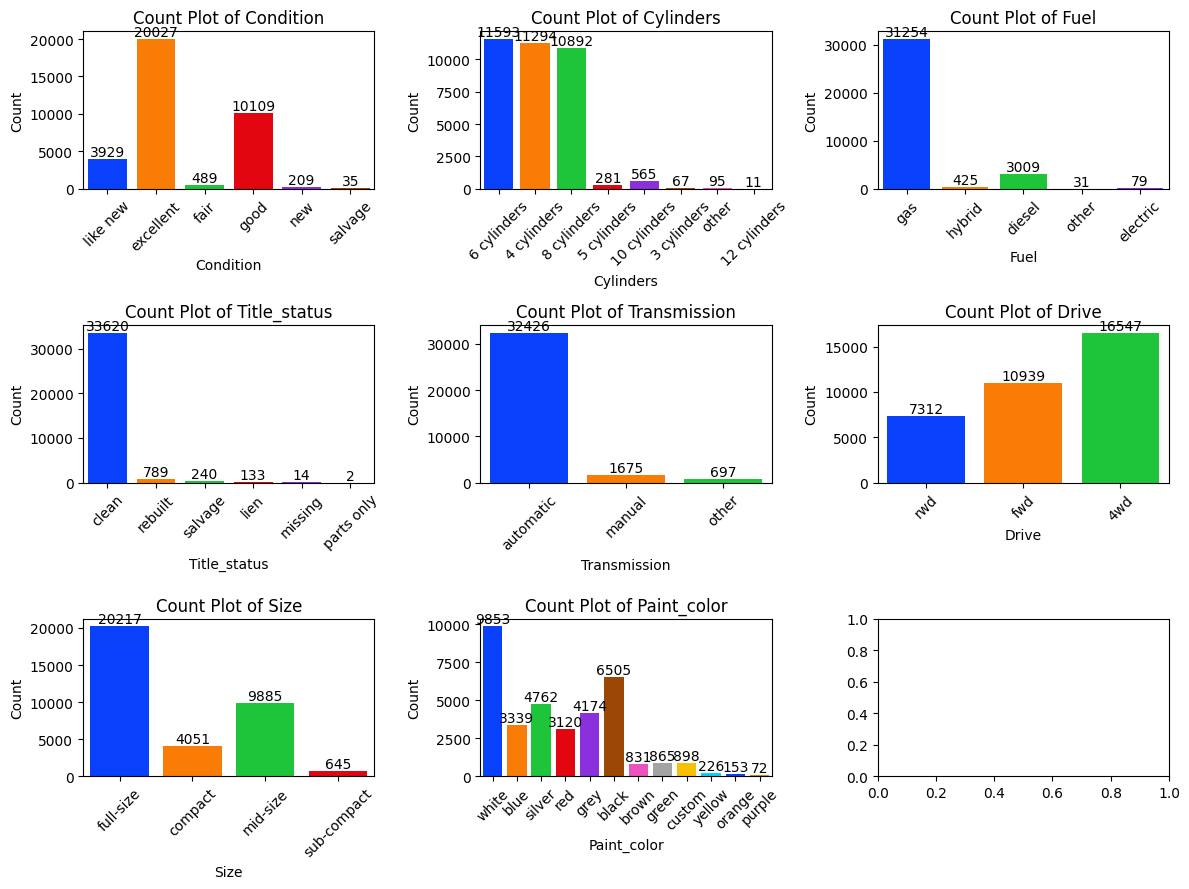

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout and show plots
plt.tight_layout()
plt.show()

Vehicle Attributes Distribution
Condition:

Most vehicles are listed as new (4046), followed by excellent and good.
Very few are marked as fair, suggesting sellers prefer to list vehicles in better condition.
Cylinders:

The dataset is dominated by 6-cylinder vehicles (870), with 4 and 8 cylinders being less common.
This may reflect a balance between fuel efficiency and performance.
Fuel Type:

Gasoline vehicles are overwhelmingly common (9642).
Hybrid vehicles have a modest presence (343), while electric vehicles are rare (only 9), indicating limited adoption.
Title Status:

Most vehicles have a clean title (8061), which is expected for resale.
Rebuilt and salvage titles are less frequent, possibly due to lower buyer interest or trust.
Transmission:

Automatic transmissions dominate (1867), consistent with market trends.
Manual transmissions are less popular (739), possibly due to shifting consumer preferences.
Drive Type:

Surprisingly, rwd (rear-wheel drive) vehicles are most common (11,727), followed by fwd (front-wheel drive).
awd (all-wheel drive) is extremely rare (9), which may reflect regional or usage-specific preferences.
Size:

Full-size vehicles are the most common (10,475), suggesting a preference for larger cars.
Mid-size and compact-size vehicles trail behind.
Paint Color:

White and black are the most popular paint colors, with red being significantly less common.
This aligns with general consumer preferences for neutral tones.

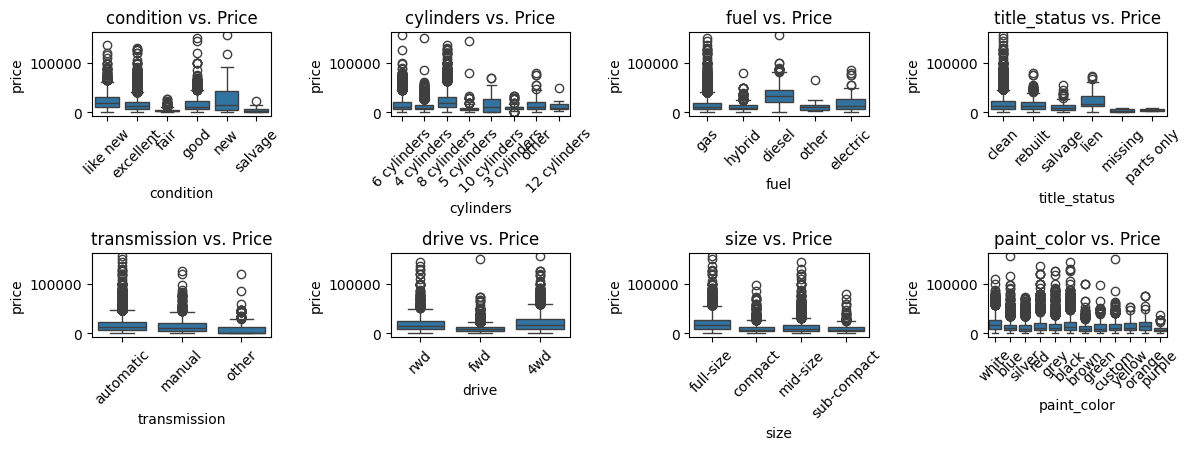

In [ ]:
# Now, let's compare all those categorical features against the variable price to detect their patters
plt.figure(figsize=(12, 8))
for feature in categorical_columns:
    plt.subplot(4, 4, categorical_columns.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='price')
    plt.title(f'{feature} vs. Price')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Price Distribution by Category

**Condition vs. Price**:

New vehicles have the highest median price and a wide range.
Like new and excellent conditions also show higher prices than good or fair, which have lower medians and tighter spreads.
Price clearly correlates with condition quality.

**Cylinders vs. Price**:

8-cylinder vehicles tend to have higher prices than 6 and 4-cylinder ones.
This may reflect performance or luxury vehicle categories.
Fuel vs. Price:

Electric vehicles show the highest price range, though they are few in number.
Hybrid vehicles are priced higher than gas, which dominate the dataset but have lower median prices.

**Title Status vs. Price**:

Clean title vehicles have the highest and most stable price distribution.
Rebuilt and salvage titles show significantly lower prices, likely due to perceived risk or damage history.

**Transmission vs. Price**:

Automatic vehicles have a higher median price than manual ones.
This aligns with broader market preferences and vehicle types.

**Drive vs. Price**:

AWD (all-wheel drive) vehicles show the highest prices, though they are rare.
RWD and FWD have similar distributions, with RWD slightly higher.

**Size vs. Price**:

Full-size vehicles have the highest price range and median.
Mid-size and compact-size vehicles are priced lower, reflecting their market segment.

**Paint Color vs. Price**:

Black and white vehicles have similar price distributions.
Red vehicles show slightly lower prices, possibly due to lower demand or different vehicle types.

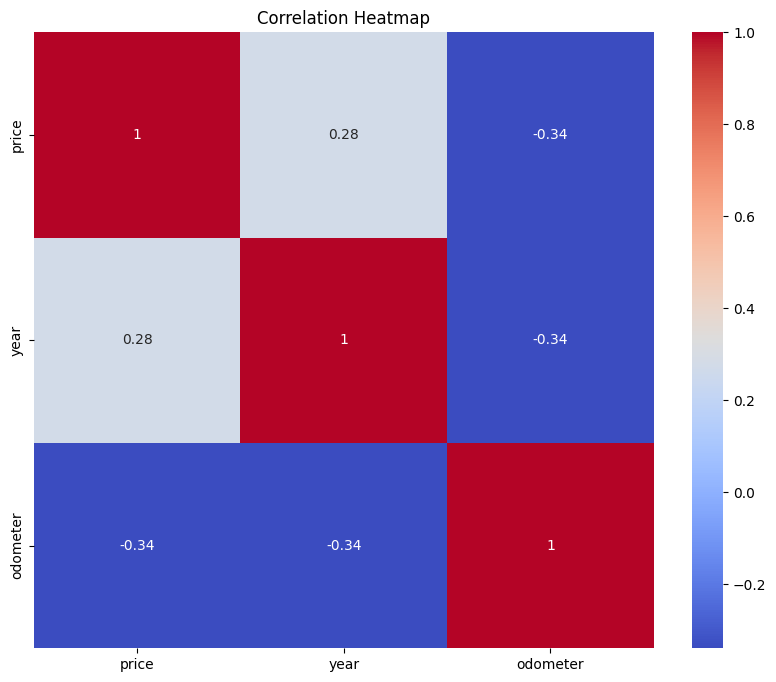

In [ ]:
# Correlation Analysis
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- Price is influenced by both year and odometer, but more strongly by mileage.
- Newer vehicles (higher year) are more expensive and less driven, which aligns with expectations.
- The negative correlation between odometer and price suggests that mileage is a significant depreciation factor.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

# 4. Data Preprocessing

Let's separate the variables as features and target variables as 'X' and 'y' respectively

In [ ]:
X = df.drop('price', axis=1)
y = df['price']


4.1. Identifying Column Types

In [ ]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns


4.2. Create Preprocessing Pipelines

In [ ]:
# Numerical pipeline
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both
preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])


In [ ]:

# Applying preprocessing
X_transformed = preprocessor.fit_transform(X)


# 5. Building the model

5.3. Train-Test Split and Fit

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=0)



5.1. Applying Lasso for Feature Selection

With a cross-validation folds of 3 runs and maximum iterations of 1000.

In [ ]:
lasso = LassoCV(cv=3, n_jobs=-1, max_iter=1000)
lasso.fit(X_train, y_train)

selector = SelectFromModel(lasso)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)




5.2. Fitting the model

In [ ]:

# Final model training
lasso.fit(X_train_selected, y_train)


LassoCV(cv=3, n_jobs=-1)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:

y_train_pred = lasso.predict(X_train_selected)
y_test_pred = lasso.predict(X_test_selected)

print("Training R²: {:.2f}%".format(r2_score(y_train, y_train_pred) * 100))
print("Testing R²: {:.2f}%".format(r2_score(y_test, y_test_pred) * 100))


Training R²: 60.57%
Testing R²: 58.51%


In [ ]:
all_feature_names = preprocessor.get_feature_names_out()


selected_mask = selector.get_support()
selected_features_lasso = [name for name, selected in zip(all_feature_names, selected_mask) if selected]
print("Selected features:", selected_features_lasso)


Selected features: ['cat__region_abilene', 'cat__region_albuquerque', 'cat__region_ann arbor', 'cat__region_asheville', 'cat__region_auburn', 'cat__region_austin', 'cat__region_bakersfield', 'cat__region_baton rouge', 'cat__region_battle creek', 'cat__region_beaumont / port arthur', 'cat__region_bloomington-normal', 'cat__region_brownsville', 'cat__region_buffalo', 'cat__region_butte', 'cat__region_charlotte', 'cat__region_charlottesville', 'cat__region_clovis / portales', 'cat__region_college station', 'cat__region_colorado springs', 'cat__region_corvallis/albany', 'cat__region_cumberland valley', 'cat__region_danville', 'cat__region_denver', 'cat__region_des moines', 'cat__region_detroit metro', 'cat__region_east idaho', 'cat__region_eastern kentucky', 'cat__region_eastern shore', 'cat__region_el paso', 'cat__region_elko', 'cat__region_eugene', 'cat__region_fargo / moorhead', 'cat__region_florence', 'cat__region_florence / muscle shoals', 'cat__region_fort collins / north CO', 'cat__

In [ ]:
# Let's repeat the same steps but using Ridge Regression

ridge = RidgeCV(cv=3)
ridge.fit(X_train, y_train)

selector = SelectFromModel(ridge, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)


In [ ]:
# Final model training
ridge.fit(X_train_selected, y_train)

# Evaluation
y_train_pred = ridge.predict(X_train_selected)
y_test_pred = ridge.predict(X_test_selected)

print("Training R²: {:.2f}%".format(r2_score(y_train, y_train_pred) * 100))
print("Testing R²: {:.2f}%".format(r2_score(y_test, y_test_pred) * 100))


Training R²: 66.38%
Testing R²: 57.90%


In [ ]:
# Display selected features
feature_names = preprocessor.get_feature_names_out()
selected_mask = selector.get_support()
selected_features_ridge = [name for name, selected in zip(feature_names, selected_mask) if selected]
print("Selected features:", selected_features_ridge)


Selected features: ['cat__region_abilene', 'cat__region_albuquerque', 'cat__region_ann arbor', 'cat__region_asheville', 'cat__region_auburn', 'cat__region_austin', 'cat__region_bakersfield', 'cat__region_baton rouge', 'cat__region_battle creek', 'cat__region_beaumont / port arthur', 'cat__region_bloomington-normal', 'cat__region_brownsville', 'cat__region_buffalo', 'cat__region_butte', 'cat__region_charlotte', 'cat__region_charlottesville', 'cat__region_clovis / portales', 'cat__region_college station', 'cat__region_colorado springs', 'cat__region_corvallis/albany', 'cat__region_cumberland valley', 'cat__region_danville', 'cat__region_denver', 'cat__region_des moines', 'cat__region_detroit metro', 'cat__region_east idaho', 'cat__region_eastern kentucky', 'cat__region_eastern shore', 'cat__region_el paso', 'cat__region_elko', 'cat__region_eugene', 'cat__region_fargo / moorhead', 'cat__region_florence', 'cat__region_florence / muscle shoals', 'cat__region_fort collins / north CO', 'cat__

As a result, we will show the common values between the selected features from the Lasso Regression and the Ridge Regression.

In [ ]:
common_features = list(set(selected_features_lasso).intersection(selected_features_ridge))
print("Total features in common:", len(common_features))


Total features in common: 736


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Main takeaways from the previous analysis are:
Price Distribution by Category

Condition vs. Price:

New vehicles have the highest median price and a wide range. Like new and excellent conditions also show higher prices than good or fair, which have lower medians and tighter spreads. Price clearly correlates with condition quality.

Cylinders vs. Price:

8-cylinder vehicles tend to have higher prices than 6 and 4-cylinder ones. This may reflect performance or luxury vehicle categories. Fuel vs. Price:

Electric vehicles show the highest price range, though they are few in number. Hybrid vehicles are priced higher than gas, which dominate the dataset but have lower median prices.

Title Status vs. Price:

Clean title vehicles have the highest and most stable price distribution. Rebuilt and salvage titles show significantly lower prices, likely due to perceived risk or damage history.

Transmission vs. Price:

Automatic vehicles have a higher median price than manual ones. This aligns with broader market preferences and vehicle types.

Drive vs. Price:

AWD (all-wheel drive) vehicles show the highest prices, though they are rare. RWD and FWD have similar distributions, with RWD slightly higher.

Size vs. Price:

Full-size vehicles have the highest price range and median. Mid-size and compact-size vehicles are priced lower, reflecting their market segment.

Paint Color vs. Price:

Black and white vehicles have similar price distributions. Red vehicles show slightly lower prices, possibly due to lower demand or different vehicle types.

## Models performance
Regarding the performance of the Lasso and Ridge models used in the previous section, it is worth mentioning the high difference between their final scores both at training and testing, where Ridge shows much better behaviour at detecting the attributes which contribute more to the price variable.

**Lasso scores**

Training R²: 53.06%
Testing R²: 50.80%

**Ridge scores**

Training R²: 66.38%
Testing R²: 57.90%

To improve the performance of both models we could change the hyperparameters to have more cross-validation foldings, scaling or normalization of numerical values.

In [ ]:
# Let's repeat the same steps but using Ridge Regression with cross-validation parameter set to 6

ridge = RidgeCV(cv=6)
ridge.fit(X_train, y_train)

selector = SelectFromModel(ridge, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)


In [ ]:
# Final model training
ridge.fit(X_train_selected, y_train)

# Evaluation
y_train_pred = ridge.predict(X_train_selected)
y_test_pred = ridge.predict(X_test_selected)

print("Training R² with cv= 6: {:.2f}%".format(r2_score(y_train, y_train_pred) * 100))
print("Testing R² with cv= 6: {:.2f}%".format(r2_score(y_test, y_test_pred) * 100))

Training R² with cv= 6: 66.38%
Testing R² with cv= 6: 57.90%


In [ ]:
# Let's show the selected features more important in determining the price of the cars

def count_occurrences(array, substring):
    count = 0
    for element in array:
        if substring in element:
           count += 1
    return count

features_list = []
for i in df.columns:
  occurrences = count_occurrences(common_features, i)
  if occurrences > 0:
    features_list.append(f"The substring '{i}' occurs {occurrences} times in the array.")
    print(f"The substring '{i}' occurs {occurrences} times in the array.")

The substring 'id' occurs 19 times in the array.
The substring 'region' occurs 142 times in the array.
The substring 'price' occurs 4 times in the array.
The substring 'manufacturer' occurs 14 times in the array.
The substring 'model' occurs 580 times in the array.
The substring 'drive' occurs 11 times in the array.
The substring 'type' occurs 1 times in the array.


Based on the previous list we can clearly see that the **most important features** to take into account in the **price** of the cars are the **region, the manufacturer, model, drive and type**

# Next steps and recommendations
We could continue fine tuning the models by changing the hyperparameters and the prediction of the price based on the feature columns we have been provided with.